<a href="https://colab.research.google.com/github/angelohafner/linguagem-de-programacao-udesc/blob/main/euler_second_order_ode_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Manual Euler Method for Second-Order ODEs (Colab Notebook)

Objective: Solve **second-order** ODEs numerically using the **explicit Euler** method implemented manually. We convert a 2nd-order ODE into a first-order system and then apply Euler.

Notes:
- Comments in code are in English.
- No compound assignment operators are used.


## 1. Theory (from 2nd order to 1st order system)
Given a second-order ODE: y'' = g(t, y, y'). Define v = y'. Then the system becomes:
- y' = v
- v' = g(t, y, v)

Explicit Euler with step h:
- y_{n+1} = y_n + h * v_n
- v_{n+1} = v_n + h * g(t_n, y_n, v_n)


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def make_time_grid(t0, tf, h):
    # Create uniform time grid [t0, tf] truncated to an integer number of steps
    n_steps = int(np.floor((tf - t0) / h))
    t = np.linspace(t0, t0 + n_steps * h, n_steps + 1)
    return t

def euler_solve_system(f, t0, tf, y0_vec, h):
    """
    Explicit Euler for systems: y' = f(t, y).
    Parameters
    ----------
    f : callable(t, y) -> ndarray
        Right-hand side of the ODE system.
    t0, tf : float
        Initial and final times.
    y0_vec : array-like
        Initial state vector at t0.
    h : float
        Time step.
    Returns
    -------
    t : ndarray shape (N+1,)
    Y : ndarray shape (N+1, d)
    """
    t = make_time_grid(t0, tf, h)
    n = t.shape[0]
    y0_arr = np.array(y0_vec, dtype=float)
    d = y0_arr.shape[0]
    Y = np.zeros((n, d), dtype=float)
    Y[0, :] = y0_arr
    for k in range(n - 1):
        tk = t[k]
        yk = Y[k, :]
        fk = f(tk, yk)
        Y[k + 1, :] = yk + h * np.array(fk, dtype=float)
    return t, Y

def plot_series(t, series, labels, title_text):
    # Plot multiple series in a single figure
    plt.figure()
    for idx in range(series.shape[1]):
        plt.plot(t, series[:, idx], label=labels[idx])
    plt.xlabel('t')
    plt.ylabel('state')
    plt.title(title_text)
    plt.legend()
    plt.grid(True)
    plt.show()


## 2. Example 1 — Mass–Spring–Damper (free response)
Model: m y'' + c y' + k y = 0. Define v = y'. Then
y' = v
v' = -(c/m) v - (k/m) y


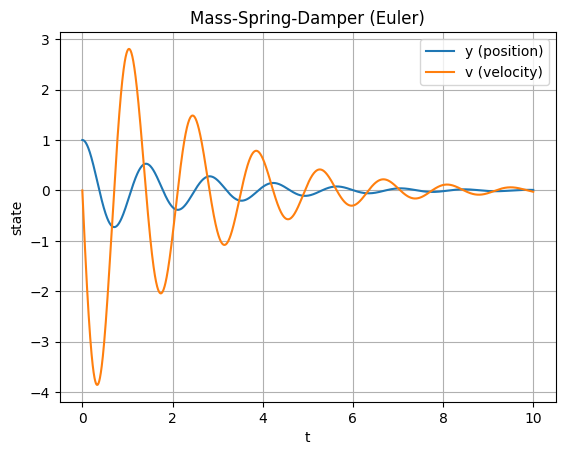

In [2]:
# Parameters
m = 1.0
c = 1.0
k = 20.0
t0 = 0.0
tf = 10.0
h = 0.005
y0 = 1.0
v0 = 0.0

def rhs_msd(t, y):
    # y = [position, velocity]
    pos = y[0]
    vel = y[1]
    dydt0 = vel
    dydt1 = -(c / m) * vel - (k / m) * pos
    return np.array([dydt0, dydt1])

t, Y = euler_solve_system(rhs_msd, t0, tf, [y0, v0], h)
plot_series(t, Y, ['y (position)', 'v (velocity)'], 'Mass-Spring-Damper (Euler)')


## 3. Example 2 — Simple Pendulum (nonlinear)
Equation: θ'' + (g/L) sin(θ) = 0. Define ω = θ'. Then
θ' = ω
ω' = -(g/L) sin(θ)


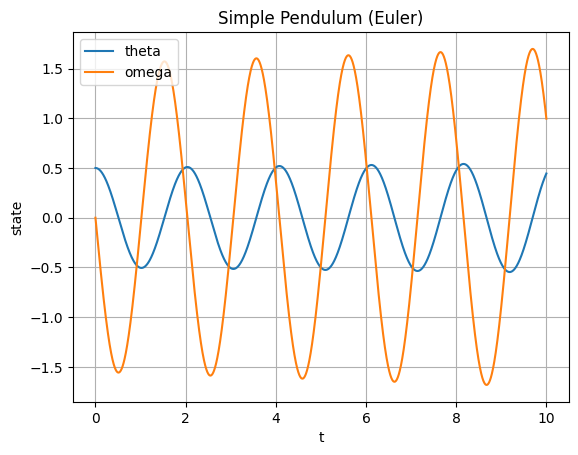

In [3]:
g = 9.81
L = 1.0
t0 = 0.0
tf = 10.0
h = 0.002
theta0 = 0.5  # rad
omega0 = 0.0  # rad/s

def rhs_pendulum(t, y):
    theta = y[0]
    omega = y[1]
    dtheta = omega
    domega = -(g / L) * np.sin(theta)
    return np.array([dtheta, domega])

t2, Y2 = euler_solve_system(rhs_pendulum, t0, tf, [theta0, omega0], h)
plot_series(t2, Y2, ['theta', 'omega'], 'Simple Pendulum (Euler)')


## 4. Example 3 — Series RLC (step input)
Let q be the capacitor charge. Equation: L q'' + R q' + (1/C) q = Vin(t).
Define i = q' (current). Then:
q' = i
i' = (Vin(t) - R i - (1/C) q) / L
Capacitor voltage is Vc = q / C.


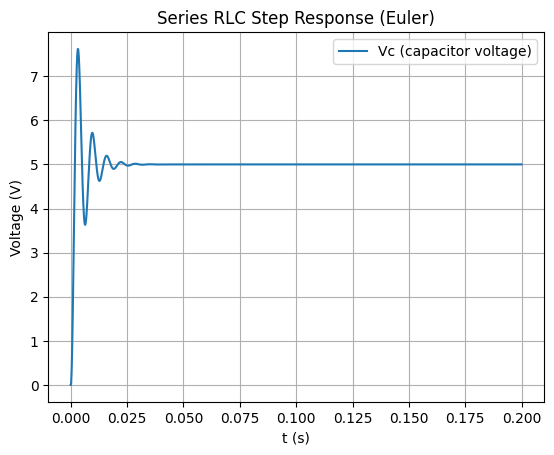

In [4]:
Lv = 10e-3
Rv = 5.0
Cv = 100e-6
Vstep = 5.0
t0 = 0.0
tf = 0.2
h = 1e-4
q0 = 0.0
i0 = 0.0

def Vin(t):
    return Vstep

def rhs_rlc(t, y):
    q = y[0]
    i = y[1]
    dq = i
    di = (Vin(t) - Rv * i - (1.0 / Cv) * q) / Lv
    return np.array([dq, di])

t3, Y3 = euler_solve_system(rhs_rlc, t0, tf, [q0, i0], h)
Vc = Y3[:, 0] / Cv
plt.figure()
plt.plot(t3, Vc, label='Vc (capacitor voltage)')
plt.xlabel('t (s)')
plt.ylabel('Voltage (V)')
plt.title('Series RLC Step Response (Euler)')
plt.legend()
plt.grid(True)
plt.show()


## 5. Example 4 — Projectile with Linear Drag (2D)
State x = [px, py, vx, vy]. Model:
px' = vx
py' = vy
vx' = -(k/m) vx
vy' = -g -(k/m) vy


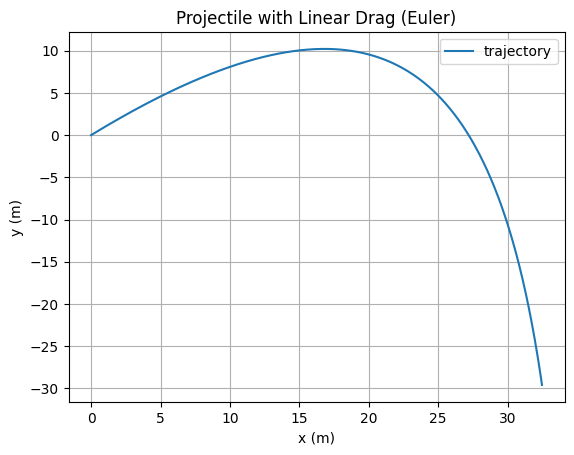

In [5]:
mproj = 0.2
kdrag = 0.1
g = 9.81
t0 = 0.0
tf = 5.0
h = 0.01
px0 = 0.0
py0 = 0.0
v0 = 25.0
angle = 45.0 * np.pi / 180.0
vx0 = v0 * np.cos(angle)
vy0 = v0 * np.sin(angle)

def rhs_projectile(t, y):
    px = y[0]
    py = y[1]
    vx = y[2]
    vy = y[3]
    dpx = vx
    dpy = vy
    dvx = -(kdrag / mproj) * vx
    dvy = -g - (kdrag / mproj) * vy
    return np.array([dpx, dpy, dvx, dvy])

t4, Y4 = euler_solve_system(rhs_projectile, t0, tf, [px0, py0, vx0, vy0], h)
# Stop when projectile hits ground (py <= 0) after launch
idx = np.argmax(Y4[:, 1] <= 0.0)
if idx == 0:
    idx = Y4.shape[0]
traj = Y4[:idx, :]
plt.figure()
plt.plot(traj[:, 0], traj[:, 1], label='trajectory')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Projectile with Linear Drag (Euler)')
plt.legend()
plt.grid(True)
plt.show()


## 6. Exercises
1) Mass–Spring–Damper with forcing: m y'' + c y' + k y = F0 * sin(Ω t). Implement and study resonance.

2) Pendulum with damping: θ'' + (b/I) θ' + (g/L) sin(θ) = 0. Compare small-angle linearization to the nonlinear model.

3) RLC with square-wave input: Replace Vin(t) with a square wave and analyze steady-state.

4) Projectile with quadratic drag: Replace dv/dt components by - (K/m) v |v| and compare ranges.
